<a href="https://colab.research.google.com/github/chehansivaruban/Cyber---SDGP/blob/main/recreate1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM


%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [105]:
df = pd.read_csv(
  "dateindex1.csv", 
  parse_dates=['datetime'], 
  index_col="datetime"
)

In [106]:
df.head()

,G
datetime,
2005-01-01 00:00:00,0.0
2005-01-01 01:00:00,55.0
2005-01-01 02:00:00,41.0
2005-01-01 03:00:00,203.0
2005-01-01 04:00:00,421.0


In [107]:
data = df.filter(['G'])
dataset = data.values
training_data_len=math.ceil(len(dataset)*0.8)

training_data_len

84153

In [108]:
#scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.04828755],
       [0.03599617],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [109]:
#training dataset
#scaled training dataset
train_data = scaled_data[0:training_data_len, :]

#split to x and y train 
x_train = []
y_train = []

for i in range(24,len(train_data)):
  x_train.append(train_data[i-24 : i, 0])
  y_train.append(train_data[i,0])
  if i<= 25:
    print(x_train)
    print(y_train)
    print()


[array([0.        , 0.04828755, 0.03599617, 0.17822495, 0.36961923,
       0.11852398, 0.21948885, 0.35293808, 0.17822495, 0.21597703,
       0.19227224, 0.11764603, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])]
[0.0]

[array([0.        , 0.04828755, 0.03599617, 0.17822495, 0.36961923,
       0.11852398, 0.21948885, 0.35293808, 0.17822495, 0.21597703,
       0.19227224, 0.11764603, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ]), array([0.04828755, 0.03599617, 0.17822495, 0.36961923, 0.11852398,
       0.21948885, 0.35293808, 0.17822495, 0.21597703, 0.19227224,
       0.11764603, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])]
[0.0, 0.06935847

In [110]:
#Convert x_train and y_train to numpy

x_train, y_train = np.array(x_train), np.array(y_train)

In [111]:
#reshape the x_train
#lstm is a 3d 

x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(84129, 24, 1)

In [112]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))


In [113]:
#compile the model

model.compile(loss='mean_squared_error', optimizer='adam')

In [114]:
model.fit(
    x_train, y_train, 
    epochs=30, 
    batch_size=32, 
    
)

Epoch 1/30
2630/2630 [==============================] - 62s 22ms/step - loss: 0.0120
Epoch 2/30
2630/2630 [==============================] - 58s 22ms/step - loss: 0.0049
Epoch 3/30
2630/2630 [==============================] - 59s 22ms/step - loss: 0.0046
Epoch 4/30
2630/2630 [==============================] - 58s 22ms/step - loss: 0.0045
Epoch 5/30
2630/2630 [==============================] - 59s 22ms/step - loss: 0.0045
Epoch 6/30
2630/2630 [==============================] - 59s 23ms/step - loss: 0.0045
Epoch 7/30
2630/2630 [==============================] - 59s 22ms/step - loss: 0.0046
Epoch 8/30
2630/2630 [==============================] - 59s 22ms/step - loss: 0.0044
Epoch 9/30
2630/2630 [==============================] - 59s 23ms/step - loss: 0.0044
Epoch 10/30
2630/2630 [==============================] - 59s 22ms/step - loss: 0.0044
Epoch 11/30
2630/2630 [==============================] - 59s 22ms/step - loss: 0.0044
Epoch 12/30
2630/2630 [==============================] - 59s 22

In [115]:
#create the testing data set
#Create a new array containing scaled values form index 84129 to end
test_data = scaled_data[training_data_len -24: , : ]
#create the data sets x_test and y_test 
x_test = []
y_test = dataset[training_data_len: , : ]

for i in range (24,len(test_data)):
  x_test.append(test_data[i-24:i , 0])

  


In [116]:
x_test

[array([0.51887165, 0.3248435 , 0.08428372, 0.00614569, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.12291376, 0.30026075, 0.47497388, 0.57154898,
        0.77523463, 0.4214186 , 0.275678  , 0.17998086]),
 array([0.3248435 , 0.08428372, 0.00614569, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.12291376, 0.30026075, 0.47497388, 0.57154898, 0.77523463,
        0.4214186 , 0.275678  , 0.17998086, 0.10623261]),
 array([0.08428372, 0.00614569, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.12291376,
        0.30026075, 0.47497388, 0.57154898, 0.77523463, 0.4214186 ,
        0.275678  , 0.17998086, 0.10623261, 0.0412639 ]),
 array([0.

In [117]:
#convert to numpy
x_test = np.array(x_test)


In [118]:
#reshape
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [119]:
#Get the models predicted value

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [120]:
#get the tmse
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

9.53134838866761

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


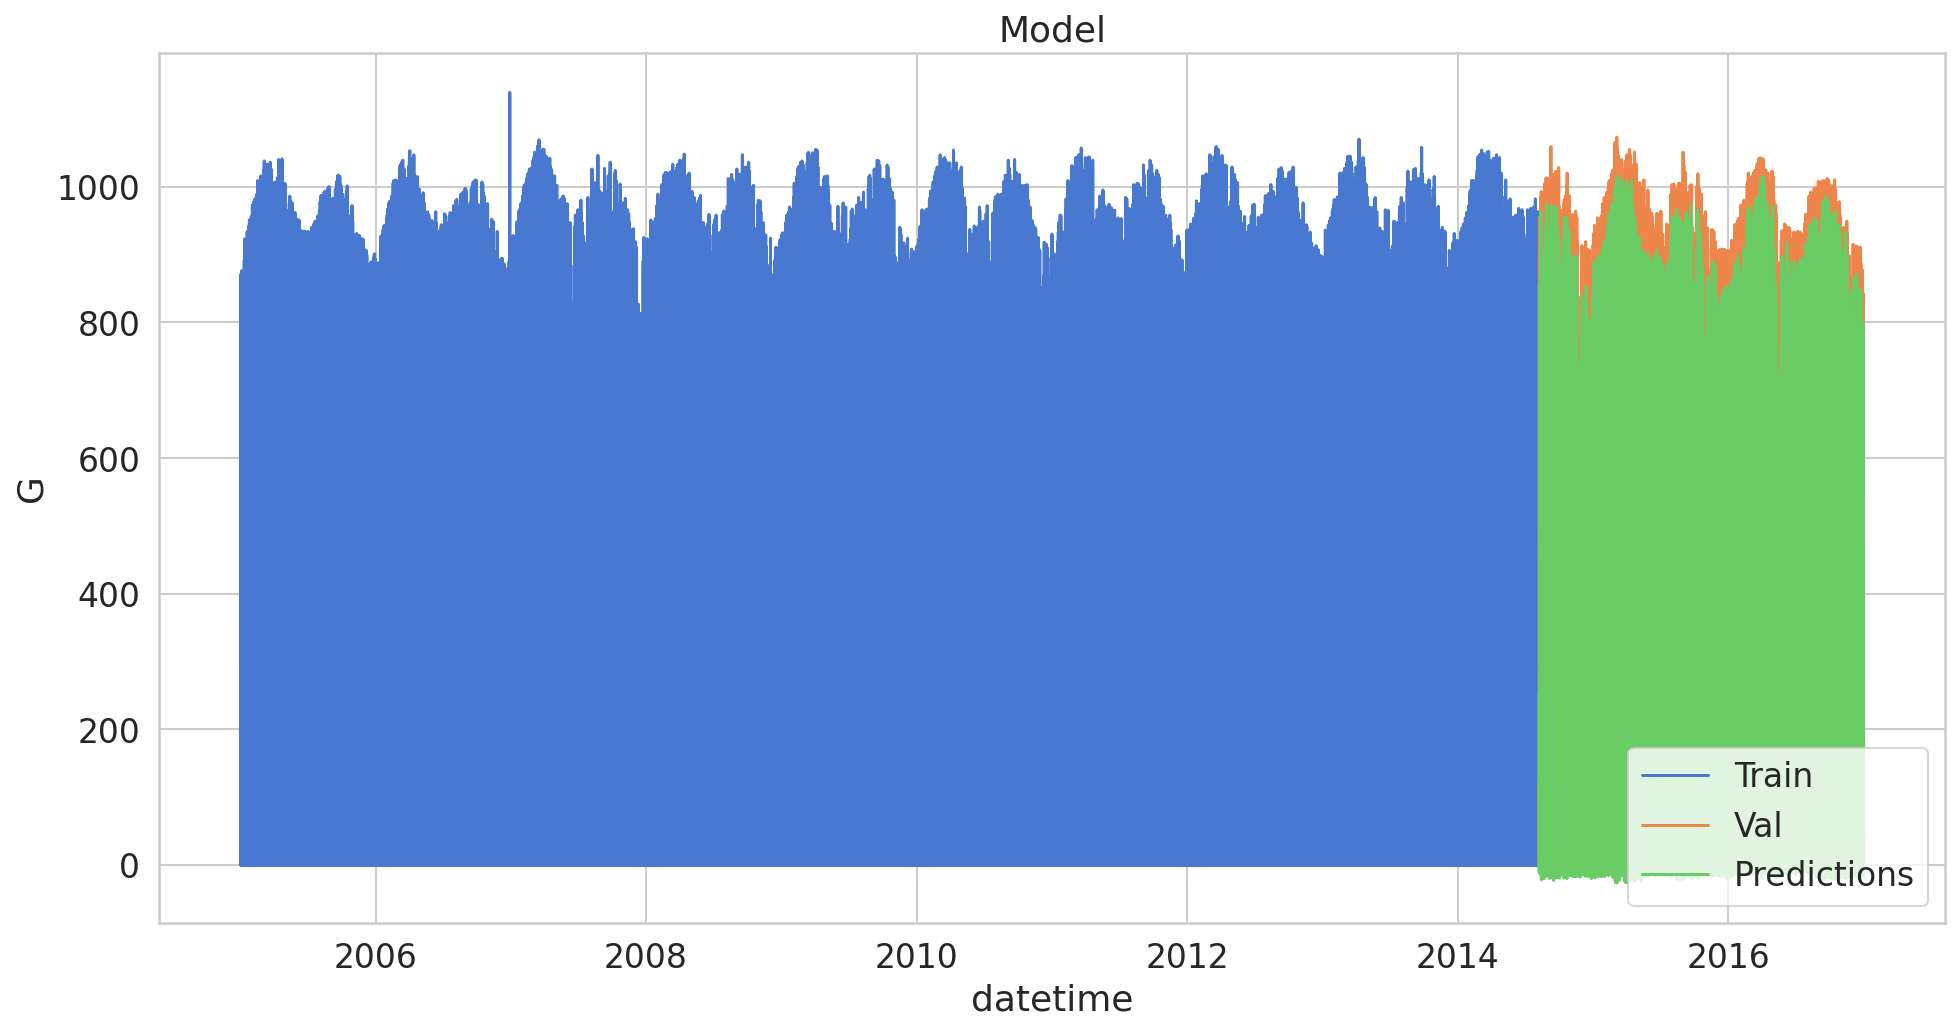

In [121]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model') 
plt.xlabel('datetime',fontsize=18)
plt.ylabel('G',fontsize=18)
plt.plot(train['G'])
plt.plot(valid[['G','Predictions']])
plt.legend(['Train','Val','Predictions'],loc ='lower right')
plt.show()

In [122]:
valid

,G,Predictions
datetime,,
2014-08-08 09:00:00,121.0,251.041138
2014-08-08 10:00:00,47.0,133.633591
2014-08-08 11:00:00,42.0,37.267616
2014-08-08 12:00:00,9.0,-6.181461
2014-08-08 13:00:00,0.0,-10.985905
...,...,...
2016-12-31 18:00:00,0.0,-5.724068
2016-12-31 19:00:00,0.0,-5.764055
2016-12-31 20:00:00,0.0,-6.064079


In [125]:
new_df = pd.read_csv(
  "dateindex1.csv", 
  parse_dates=['datetime'], 
  index_col="datetime"
)
new_df = new_df.filter(['G'])
last_24_hours = new_df[-24:].values

last_24_hours_scaled = scaler.transform(last_24_hours)

X_test = []
#apend the past 24 hours
X_test.append(last_24_hours_scaled)
#convert the X_test to numpy

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[-2.8694508]]


In [124]:
# Save entire model to a HDF5 file
model.save('recreate_model.h5')